# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
url = f"{base_url}appid={weather_api_key}&units={units}&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cockburn town
Processing Record 2 of Set 1 | badger
Processing Record 3 of Set 1 | sirjan
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | manta
Processing Record 10 of Set 1 | afaahiti
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | salta
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | qamdo
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | valley city
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | olonkinbyen
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | adamstown
Processing Record 23 of Set 1 

Processing Record 40 of Set 4 | la passe
Processing Record 41 of Set 4 | rio grande
Processing Record 42 of Set 4 | bhimunipatnam
Processing Record 43 of Set 4 | tumayr
Processing Record 44 of Set 4 | constitucion
Processing Record 45 of Set 4 | nabire
Processing Record 46 of Set 4 | hobyo
Processing Record 47 of Set 4 | magnitka
Processing Record 48 of Set 4 | lugovoye
Processing Record 49 of Set 4 | saint-francois
Processing Record 0 of Set 5 | havre
Processing Record 1 of Set 5 | soio
Processing Record 2 of Set 5 | polyarnyy
Processing Record 3 of Set 5 | derzhavinsk
Processing Record 4 of Set 5 | tura
Processing Record 5 of Set 5 | port-vila
Processing Record 6 of Set 5 | roma
Processing Record 7 of Set 5 | colonia
Processing Record 8 of Set 5 | klyuchi
Processing Record 9 of Set 5 | sos'va
Processing Record 10 of Set 5 | yagry
City not found. Skipping...
Processing Record 11 of Set 5 | baissa
Processing Record 12 of Set 5 | novomalorossiyskaya
Processing Record 13 of Set 5 | koneu

Processing Record 28 of Set 8 | singkil
Processing Record 29 of Set 8 | kamakwie
Processing Record 30 of Set 8 | st. john's
Processing Record 31 of Set 8 | cartagena del chaira
Processing Record 32 of Set 8 | blenheim
Processing Record 33 of Set 8 | casablanca
Processing Record 34 of Set 8 | longboat key
Processing Record 35 of Set 8 | dudinka
Processing Record 36 of Set 8 | lazaro cardenas
Processing Record 37 of Set 8 | saldanha
Processing Record 38 of Set 8 | torghay
Processing Record 39 of Set 8 | san luis
Processing Record 40 of Set 8 | boguchar
Processing Record 41 of Set 8 | scarborough
Processing Record 42 of Set 8 | ta`u
Processing Record 43 of Set 8 | fraga
Processing Record 44 of Set 8 | gondia
Processing Record 45 of Set 8 | myeik
Processing Record 46 of Set 8 | north bondi
Processing Record 47 of Set 8 | bubaque
Processing Record 48 of Set 8 | whiteville
Processing Record 49 of Set 8 | puerto baquerizo moreno
Processing Record 0 of Set 9 | winnemucca
Processing Record 1 of

Processing Record 16 of Set 12 | rio preto da eva
Processing Record 17 of Set 12 | chowchilla
Processing Record 18 of Set 12 | wajir
Processing Record 19 of Set 12 | dar naim
City not found. Skipping...
Processing Record 20 of Set 12 | usogorsk
Processing Record 21 of Set 12 | argostolion
Processing Record 22 of Set 12 | kingston
Processing Record 23 of Set 12 | vyazemskiy
Processing Record 24 of Set 12 | alakurtti
Processing Record 25 of Set 12 | port moresby
Processing Record 26 of Set 12 | puerto ayacucho
Processing Record 27 of Set 12 | jinghong
Processing Record 28 of Set 12 | pervomayskiy
Processing Record 29 of Set 12 | ola
Processing Record 30 of Set 12 | umba
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cockburn town,21.4612,-71.1419,27.19,79,10,7.38,TC,1701834678
1,badger,64.8000,-147.5333,-17.58,83,100,1.54,US,1701834412
2,sirjan,29.4520,55.6814,8.99,20,0,0.76,IR,1701834679
3,iqaluit,63.7506,-68.5145,-14.15,84,20,1.03,CA,1701834679
4,blackmans bay,-43.0167,147.3167,22.07,37,8,1.34,AU,1701834679


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cockburn town,21.4612,-71.1419,27.19,79,10,7.38,TC,1701834678
1,badger,64.8000,-147.5333,-17.58,83,100,1.54,US,1701834412
2,sirjan,29.4520,55.6814,8.99,20,0,0.76,IR,1701834679
3,iqaluit,63.7506,-68.5145,-14.15,84,20,1.03,CA,1701834679
4,blackmans bay,-43.0167,147.3167,22.07,37,8,1.34,AU,1701834679


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

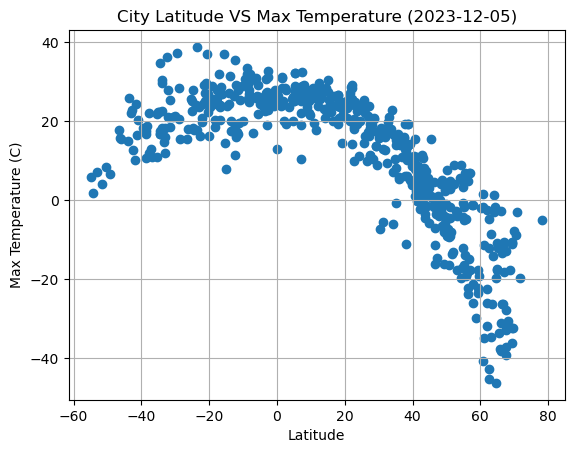

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title(f"City Latitude VS Max Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

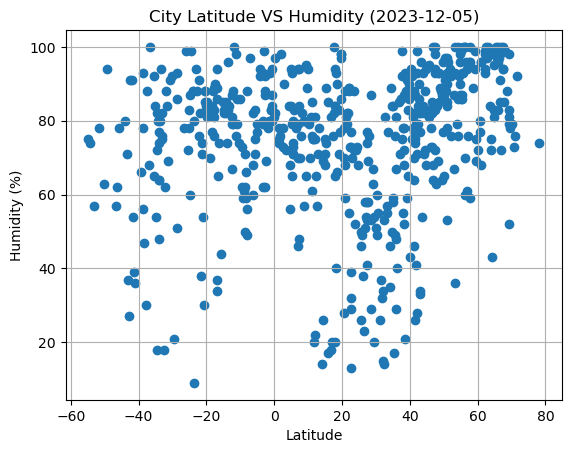

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title(f"City Latitude VS Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

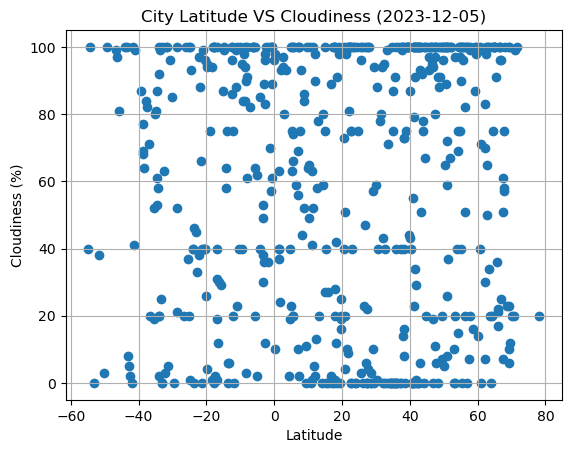

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title(f"City Latitude VS Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

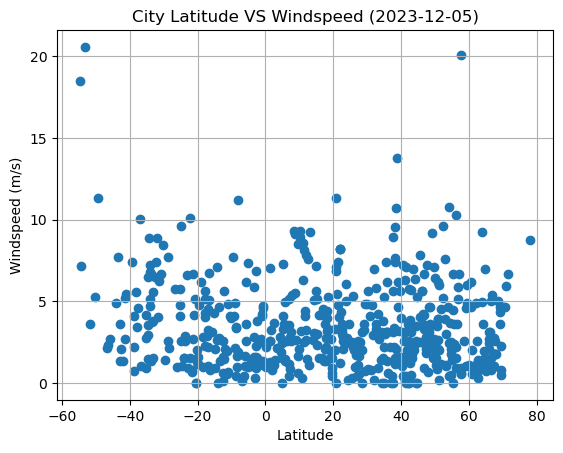

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title(f"City Latitude VS Windspeed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Windspeed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def lin_reg_func(df, param):
    x_values = df['Lat']
    y_values = df[param]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    print(f"The r-value is: {rvalue**2}")
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    
    plt.xlabel('Latitude')
    plt.ylabel(param)
        
    return line_eq

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cockburn town,21.4612,-71.1419,27.19,79,10,7.38,TC,1701834678
1,badger,64.8000,-147.5333,-17.58,83,100,1.54,US,1701834412
2,sirjan,29.4520,55.6814,8.99,20,0,0.76,IR,1701834679
3,iqaluit,63.7506,-68.5145,-14.15,84,20,1.03,CA,1701834679
6,tiksi,71.6872,128.8694,-19.80,92,100,6.67,RU,1701834680


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,blackmans bay,-43.0167,147.3167,22.07,37,8,1.34,AU,1701834679
5,grytviken,-54.2811,-36.5092,1.74,74,100,7.17,GS,1701834679
8,manta,-0.9500,-80.7333,24.88,83,100,4.12,EC,1701834680
9,afaahiti,-17.7500,-149.2833,24.93,81,100,4.26,PF,1701834680
11,avarua,-21.2078,-159.7750,27.03,74,40,6.69,CK,1701834681


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7681672427143613


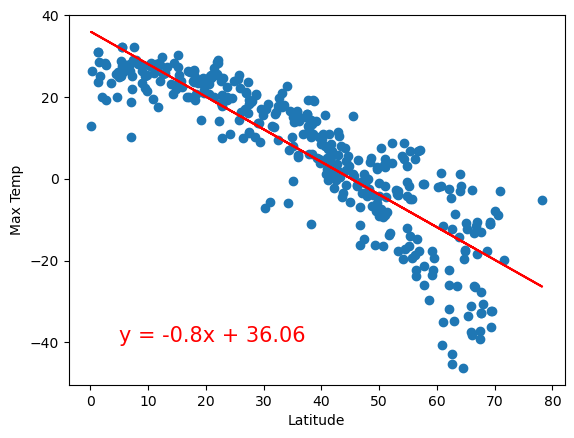

In [36]:
# Linear regression on Northern Hemisphere

tempvslat_N = lin_reg_func(northern_hemi_df,'Max Temp')

plt.annotate(tempvslat_N,(5,-40),fontsize=15,color="red")
plt.show()

The r-value is: 0.29240454074531613


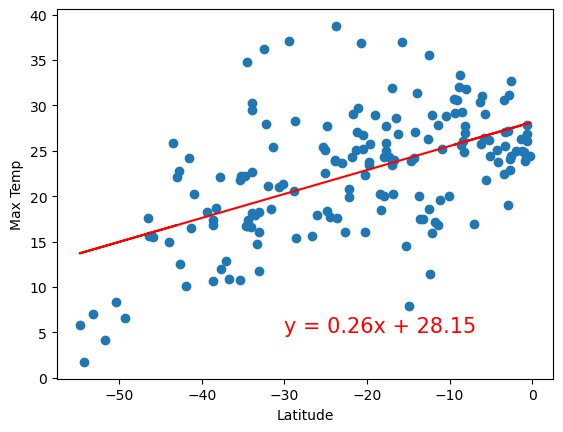

In [37]:
# Linear regression on Southern Hemisphere
tempvslat_S = lin_reg_func(southern_hemi_df,'Max Temp')

plt.annotate(tempvslat_S,(-30,5),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** 
The linear regression model for the Nothern Hemisphere is negative compared to the Southern Hemisphere. This suggests that the temperature decreases when moving away from the equator. The correlation between the temperature and nothern hemisphere is strong but the correlation for the southern hemisphere is weak. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09960823798007366


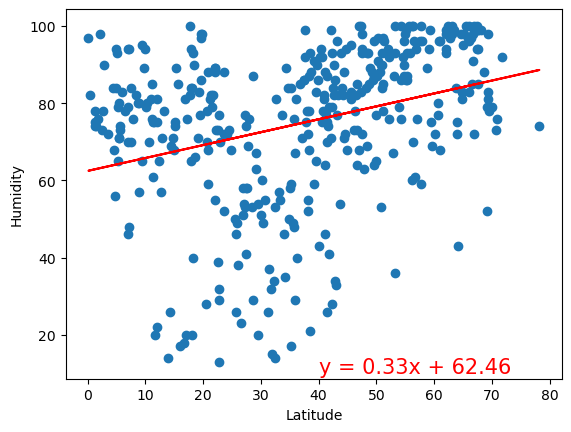

In [38]:
# Northern Hemisphere
humvslat_N = lin_reg_func(northern_hemi_df,'Humidity')

plt.annotate(humvslat_N,(40,10),fontsize=15,color="red")
plt.show()

The r-value is: 0.05584325604848079


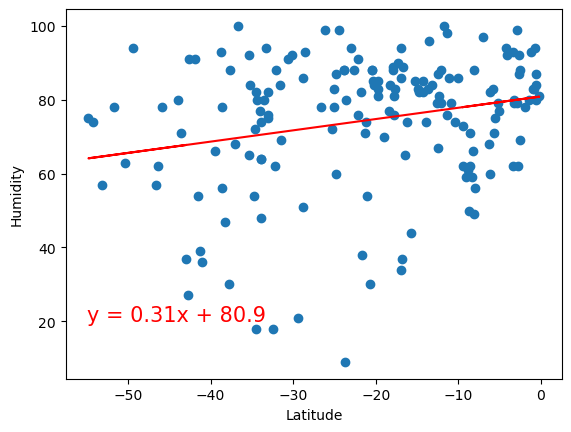

In [39]:
# Southern Hemisphere
humvslat_S = lin_reg_func(southern_hemi_df,'Humidity')

plt.annotate(humvslat_S,(-55,20),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** 
The scatter plot is all over the plot. The linear regression model doesnt seem to be accurate with these plots since the correlation is also extremely weak. Humidity does not seem to be related to the latitude in the nothern not the southern hemisphere.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.011715281987399396


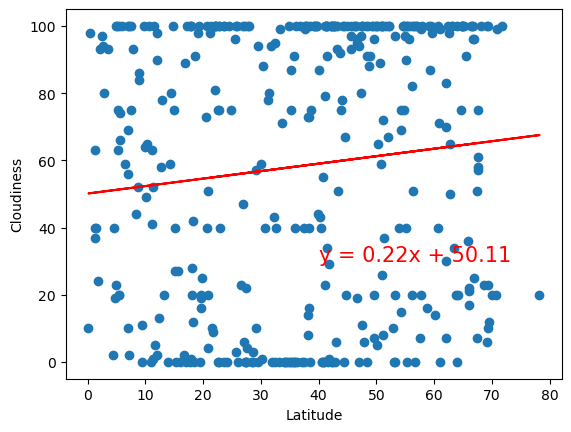

In [40]:
# Northern Hemisphere
cldvslat_N = lin_reg_func(northern_hemi_df,'Cloudiness')

plt.annotate(cldvslat_N,(40, 30),fontsize=15,color="red")
plt.show()

The r-value is: 0.018027804103311642


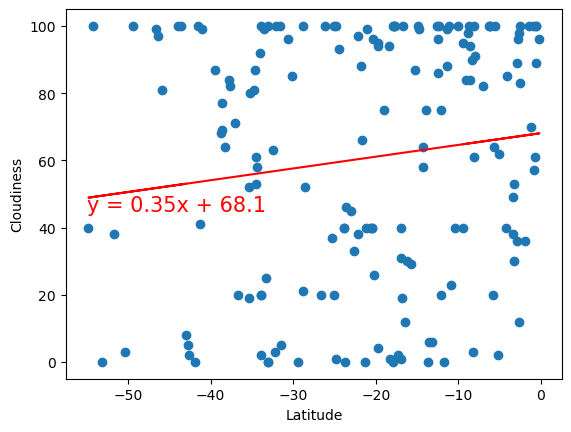

In [41]:
# Southern Hemisphere
cldvslat_S = lin_reg_func(southern_hemi_df,'Cloudiness')

plt.annotate(cldvslat_S,(-55, 45),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** 
The scatter points are all over the plot. The correlation is also extremely low which suggests that cloudiness is not related to the latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.001273033912288618


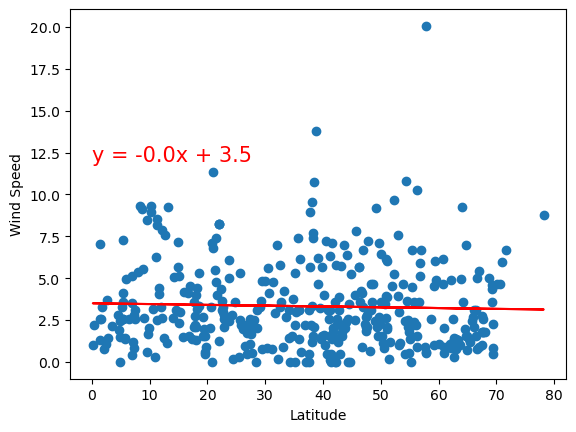

In [42]:
# Northern Hemisphere
windvslat_N = lin_reg_func(northern_hemi_df,'Wind Speed')

plt.annotate(windvslat_N,(0, 12),fontsize=15,color="red")
plt.show()

The r-value is: 0.14188315964299272


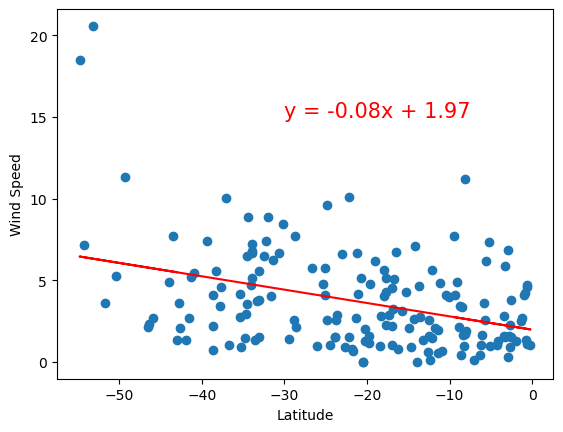

In [43]:
# Southern Hemisphere
windvslat_S = lin_reg_func(southern_hemi_df,'Wind Speed')

plt.annotate(windvslat_S,(-30, 15),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** 
There doesnt seem to be any direct correlation between wind speed and the latitude as the regression model is not accurate. However, it can be noticed that the extreme wind speeds occur in latitudes farthest away from the equator.
